In [32]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sn

In [5]:
path = '2025.2 - Sysarmy - Encuesta de remuneración salarial Argentina - Sysarmy - sueldos - 2025.02CLEAN.csv'
df = pd.read_csv(path)
df

,Para analizar los resultados podés bajar el .csv (Archivo > Descargar) \n \nRecordá calificar a la empresa donde estás trabajando en www.openqube.io\n\nEsta obra está bajo una Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3752,Buenos Aires,Part-Time,Staff (planta permanente),4500000,4250000,NaN,NaN,Un sueldo,Performance individual,Uno,...,NaN,NaN,NaN,NaN,27,Hombre Cis,No,FALSE,Senior,4500000
3753,Buenos Aires,Full-Time,Tercerizado (trabajo a través de consultora o ...,1400000,1200000,NaN,NaN,No,No recibo bono,Uno,...,NaN,NaN,NaN,NaN,25,Hombre Cis,Sí,FALSE,Semi-Senior,1400000
3754,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),3700000,3200000,NaN,NaN,No,No recibo bono,Dos,...,NaN,NaN,NaN,NaN,43,Hombre Cis,Sí,FALSE,Senior,3700000
3755,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),3200000,2567000,NaN,NaN,Un sueldo,Mix de las anteriores,Tres,...,NaN,NaN,NaN,NaN,24,Hombre Cis,Sí,FALSE,Semi-Senior,3200000


Como vemos, no estamos obteniendo los datos de forma correcta ya que el archivo.csv tiene las primerlas 9 filas con texto que no es de interes para este análisis y termina siendo perjudicial al momento de leer el dataset. Lo mas conveniente es hacer una lectura desde la fila que contiene los encabezados

In [6]:
df_fixed = pd.read_csv(path, skiprows=range(8), header=1)

In [7]:
df_fixed

,donde_estas_trabajando,dedicacion,tipo_de_contrato,ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos,ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos,pagos_en_dolares,si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron,recibis_algun_tipo_de_bono,a_que_esta_atado_el_bono,tuviste_actualizaciones_de_tus_ingresos_laborales_durante_el_ultimo_semestre,...,salir_o_seguir_contestando_sobre_las_guardias1,tenes_guardias,cuanto_cobras_por_guardia,aclara_el_numero_que_ingresaste_en_el_campo_anterior,tengo_edad,genero,habias_respondido_nuestra_encuesta_en_ediciones_anteriores,sueldo_dolarizado,seniority,_sal
0,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),2511178.00,2085000.00,Cobro parte del salario en dólares,Dólar oficial al día de oago,No,No recibo bono,Uno,...,NaN,NaN,NaN,NaN,43,Mujer Cis,No,True,Semi-Senior,2511178.00
1,Buenos Aires,Full-Time,Tercerizado (trabajo a través de consultora o ...,2140000.00,2140000.00,Cobro todo el salario en dólares,1160,No,No recibo bono,Uno,...,NaN,NaN,NaN,NaN,59,Mujer Cis,Sí,True,Senior,2140000.00
2,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),3000000.00,310000.00,Cobro parte del salario en dólares,NaN,3+ sueldos,Performance de la compañía,No,...,NaN,NaN,NaN,NaN,39,Hombre Cis,Sí,True,Semi-Senior,3000000.00
3,Mendoza,Full-Time,Contractor,4000000.00,4000000.00,Cobro todo el salario en dólares,1185,No,No recibo bono,No,...,Terminar encuesta,No,0.0,Neto,37,Hombre Cis,Sí,True,Senior,4000000.00
4,Buenos Aires,Full-Time,Staff (planta permanente),1300000.00,1000000.00,Cobro parte del salario en dólares,NaN,De uno a tres sueldos,Mix de las anteriores,No,...,NaN,NaN,NaN,NaN,35,Hombre Cis,Sí,True,Senior,1300000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,Buenos Aires,Part-Time,Staff (planta permanente),4500000.00,4250000.00,NaN,NaN,Un sueldo,Performance individual,Uno,...,NaN,NaN,NaN,NaN,27,Hombre Cis,No,False,Senior,4500000.00
3744,Buenos Aires,Full-Time,Tercerizado (trabajo a través de consultora o ...,1400000.00,1200000.00,NaN,NaN,No,No recibo bono,Uno,...,NaN,NaN,NaN,NaN,25,Hombre Cis,Sí,False,Semi-Senior,1400000.00
3745,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),3700000.00,3200000.00,NaN,NaN,No,No recibo bono,Dos,...,NaN,NaN,NaN,NaN,43,Hombre Cis,Sí,False,Senior,3700000.00
3746,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),3200000.00,2567000.00,NaN,NaN,Un sueldo,Mix de las anteriores,Tres,...,NaN,NaN,NaN,NaN,24,Hombre Cis,Sí,False,Semi-Senior,3200000.00


Vamos a renombrar las columnas para mayor facilidad al momento de realizar el análisis del DataFrame. Crearemos categorías que nos ayuden a agrupar los encabezados

In [8]:
df_fixed.columns

Index(['donde_estas_trabajando', 'dedicacion', 'tipo_de_contrato',
       'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos',
       'ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos',
       'pagos_en_dolares',
       'si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron',
       'recibis_algun_tipo_de_bono', 'a_que_esta_atado_el_bono',
       'tuviste_actualizaciones_de_tus_ingresos_laborales_durante_el_ultimo_semestre',
       'de_que_fue_el_ajuste_total_acumulado',
       'en_que_mes_fue_el_ultimo_ajuste',
       'como_consideras_que_estan_tus_ingresos_laborales_comparados_con_el_semestre_anterior',
       'contas_con_beneficios_adicionales',
       'que_tan_conforme_estas_con_tus_ingresos_laborales',
       'estas_buscando_trabajo', 'pluriempleo', 'trabajo_de',
       'anos_de_experiencia', 'antiguedad_en_la_empresa_actual',
       'anos_en_el_puesto_actual', 'cuantas_personas_tenes_a_cargo',
       'plataformas_que_utilizas_en_tu_puesto_act

In [9]:
new_columns = {
  'profile': {
      'genero': 'gender',
      'tengo_edad': 'age',
      'anos_de_experiencia': 'years_experience',
      'maximo_nivel_de_estudios': 'studies_level',
      'estado': 'studies_level_state',
      'carrera': 'career',
      'institucion_educativa': 'university',
      'habias_respondido_nuestra_encuesta_en_ediciones_anteriores': 'answered_previous_editions'
  },

  'work' : {
      'donde_estas_trabajando': 'province',
      'antiguedad_en_la_empresa_actual': 'years_in_company',
      'anos_en_el_puesto_actual': 'years_in_current_position',
      'cuantas_personas_tenes_a_cargo': 'people_in_charge_of',
      'tenes_guardias': 'on_call_duty',
      'modalidad_de_trabajo':'work_modality',
      'tipo_de_contrato':'contract_type',
      'dedicacion': 'dedication',
      'estas_buscando_trabajo': 'looking_for_job',
      'pluriempleo': 'multiple_jobs',
      'seniority': 'seniority',
      'vibe_coding': 'vibe_coding'
  },

  'tools': {
      'plataformas_que_utilizas_en_tu_puesto_actual': 'platform',
      'lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual': 'programming_languages',
      'frameworksherramientas_y_librerias_que_utilices_en_tu_puesto_actual': 'frameworks',
      'bases_de_datos': 'data_bases',
      'qa_testing': 'qa_testing',
      'que_tanto_estas_usando_copilotchatgpt_u_otras_herramientas_de_ia_para_tu_trabajo':'copilotchatgpt'
  },

  'salary': {
      'cuanto_cobras_por_guardia': 'on_call_duty_charge',
      'aclara_el_numero_que_ingresaste_en_el_campo_anterior': 'on_call_duty_charge_notes',
      'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos': 'monthly_BRUTO',
      'ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos': 'monthly_NETO',
      'pagos_en_dolares': 'in_usd',
      'si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron':'last_dollar_value',
      'como_consideras_que_estan_tus_ingresos_laborales_comparados_con_el_semestre_anterior': 'comparison_last_semester',
      'que_tan_conforme_estas_con_tus_ingresos_laborales': 'satisfaction',
      'recibis_algun_tipo_de_bono': 'has_bonus',
      'a_que_esta_atado_el_bono': 'bonus_tied_to',
      'tuviste_actualizaciones_de_tus_ingresos_laborales_durante_el_ultimo_semestre': 'inflation_adjustment_from_last_semester',
      'de_que_fue_el_ajuste_total_acumulado': 'percentage_inflation_adjustment',
      'en_que_mes_fue_el_ultimo_ajuste': 'month_last_inflation_adjustment',
      'contas_con_beneficios_adicionales': 'benefit',
      'sueldo_dolarizado': 'salary_dollarized',
      '_sal': 'salary_target'
  },

  'company' : {
      'cantidad_de_personas_en_tu_organizacion': 'employee_number',
      'trabajo_de': 'main_activity',
      'la_recomendas_como_un_buen_lugar_para_trabajar': 'recommended',
      'si_trabajas_bajo_un_esquema_hibrido_cuantos_dias_a_la_semana_vas_a_la_oficina':'days_in_the_office',
      'en_los_ultimos_6_mesesse_aplico_alguna_politica_de_ajustes_salariales': 'policy_salary_adjust_last6m',
      'en_los_ultimos_6_meseshubo_reduccion_de_personal': 'layoffs_last6m'
  },

  'hiring': {
      'cual_es_la_cantidad_maxima_de_entrevistas_que_consideras_aceptable_en_un_proceso_de_seleccion': 'hiring_max_interviews_ok',
      'cual_es_la_combinacion_de_entrevistas_que_consideras_mejor_en_tu_experiencia_como_candidatoa': 'hiring_interview_mix_preferred',
      'desafios_tecnicoscomo_los_preferiselegi_todas_las_opciones_que_consideres': 'hiring_tech_challenge_preference',
      'cuantas_horas_te_parecen_correctas_dedicarle_a_un_desafio_tecnico_asincronico': 'hiring_tech_challenge_hours',
      'cual_de_las_siguientes_frases_representa_mejor_tu_opinion_acerca_de_los_procesos_de_seleccion': 'hiring_opinion_statement'
  },

  # columnas de control de flujo
  'flow' : {
      'salir_o_seguir_contestando': 'flow_continue',
      'salir_o_seguir_contestando_sobre_las_guardias': 'flow_continue_oncall',
      'salir_o_seguir_contestando_sobre_las_guardias1': 'flow_continue_oncall_1'
  }
}

In [10]:
def replace_columns(df, new_columns):
    new_columns_names= {
        original_name: category + '_' + new_name
        for category, cols in new_columns.items()
        for original_name, new_name in cols.items()
    }
    return df.rename(columns=new_columns_names)

In [11]:
df_renamed = replace_columns(df_fixed, new_columns)
df_renamed

,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_from_last_semester,...,flow_flow_continue_oncall_1,work_on_call_duty,salary_on_call_duty_charge,salary_on_call_duty_charge_notes,profile_age,profile_gender,profile_answered_previous_editions,salary_salary_dollarized,work_seniority,salary_salary_target
0,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),2511178.00,2085000.00,Cobro parte del salario en dólares,Dólar oficial al día de oago,No,No recibo bono,Uno,...,NaN,NaN,NaN,NaN,43,Mujer Cis,No,True,Semi-Senior,2511178.00
1,Buenos Aires,Full-Time,Tercerizado (trabajo a través de consultora o ...,2140000.00,2140000.00,Cobro todo el salario en dólares,1160,No,No recibo bono,Uno,...,NaN,NaN,NaN,NaN,59,Mujer Cis,Sí,True,Senior,2140000.00
2,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),3000000.00,310000.00,Cobro parte del salario en dólares,NaN,3+ sueldos,Performance de la compañía,No,...,NaN,NaN,NaN,NaN,39,Hombre Cis,Sí,True,Semi-Senior,3000000.00
3,Mendoza,Full-Time,Contractor,4000000.00,4000000.00,Cobro todo el salario en dólares,1185,No,No recibo bono,No,...,Terminar encuesta,No,0.0,Neto,37,Hombre Cis,Sí,True,Senior,4000000.00
4,Buenos Aires,Full-Time,Staff (planta permanente),1300000.00,1000000.00,Cobro parte del salario en dólares,NaN,De uno a tres sueldos,Mix de las anteriores,No,...,NaN,NaN,NaN,NaN,35,Hombre Cis,Sí,True,Senior,1300000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,Buenos Aires,Part-Time,Staff (planta permanente),4500000.00,4250000.00,NaN,NaN,Un sueldo,Performance individual,Uno,...,NaN,NaN,NaN,NaN,27,Hombre Cis,No,False,Senior,4500000.00
3744,Buenos Aires,Full-Time,Tercerizado (trabajo a través de consultora o ...,1400000.00,1200000.00,NaN,NaN,No,No recibo bono,Uno,...,NaN,NaN,NaN,NaN,25,Hombre Cis,Sí,False,Semi-Senior,1400000.00
3745,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),3700000.00,3200000.00,NaN,NaN,No,No recibo bono,Dos,...,NaN,NaN,NaN,NaN,43,Hombre Cis,Sí,False,Senior,3700000.00
3746,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),3200000.00,2567000.00,NaN,NaN,Un sueldo,Mix de las anteriores,Tres,...,NaN,NaN,NaN,NaN,24,Hombre Cis,Sí,False,Semi-Senior,3200000.00


In [12]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/refs/heads/master/sysarmy_survey_2025_processed.csv'
df2 = pd.read_csv(url)

In [13]:
df2

,Unnamed: 0,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,salir_o_seguir_contestando_sobre_las_guardias,work_on_call_duty,salary_on_call_duty_charge,aclara_el_numero_que_ingresaste_en_el_campo_anterior,profile_age,profile_gender,habias_respondido_nuestra_encuesta_en_ediciones_anteriores,sueldo_dolarizado,seniority,_sal
0,0,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),6500000.0,5800000.0,Cobro parte del salario en dólares,NaN,De uno a tres sueldos,Performance de la compañía,...,NaN,NaN,NaN,NaN,45,Hombre Cis,Sí,True,Senior,6500000.0
1,1,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,12700000.0,10200000.0,Cobro todo el salario en dólares,NaN,Un sueldo,Performance de la compañía,...,Terminar encuesta,No,0.0,Bruto,32,Mujer Cis,Sí,True,Senior,12700000.0
2,2,Córdoba,Full-Time,Staff (planta permanente),3952805.0,3137662.0,Cobro parte del salario en dólares,985,No,No recibo bono,...,NaN,NaN,NaN,NaN,29,Hombre Cis,Sí,True,Semi-Senior,3952805.0
3,3,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),1606000.0,1360000.0,Cobro parte del salario en dólares,1004,No,No recibo bono,...,NaN,NaN,NaN,NaN,25,Hombre Cis,Sí,True,Semi-Senior,1606000.0
4,4,Córdoba,Full-Time,Tercerizado (trabajo a través de consultora o ...,1325301.0,NaN,Cobro parte del salario en dólares,NaN,No,No recibo bono,...,Terminar encuesta,NaN,NaN,NaN,22,Hombre Cis,Sí,True,Senior,1325301.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,5320,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),2200000.0,1800000.0,NaN,NaN,De uno a tres sueldos,Mix de las anteriores,...,Terminar encuesta,NaN,NaN,NaN,50,Hombre Cis,Sí,False,Senior,2200000.0
5192,5321,Ciudad Autónoma de Buenos Aires,Full-Time,Tercerizado (trabajo a través de consultora o ...,1600000.0,1300000.0,NaN,NaN,No,No recibo bono,...,Responder sobre guardias,No,0.0,Porcentaje de mi sueldo bruto,23,Hombre Cis,Sí,False,Junior,1600000.0
5193,5322,Salta,Full-Time,Contractor,3000000.0,2400000.0,NaN,NaN,Menos de un sueldo,Mix de las anteriores,...,NaN,NaN,NaN,NaN,28,Hombre Cis,Sí,False,Semi-Senior,3000000.0
5194,5323,Tierra del Fuego,Full-Time,Staff (planta permanente),5000000.0,4200000.0,NaN,NaN,Menos de un sueldo,Votado por decisión colectiva,...,NaN,NaN,NaN,NaN,58,Hombre Cis,No,False,Senior,5000000.0


### Estadística Descriptiva

A continuación vamos a trabajar con el df2 ya que contiene mas información para analizar

In [15]:
len(df2)

5196

#### Análisis de Salarios de IT en Argentina

In [23]:
salary = 'salary_monthly_NETO'

In [33]:
df2[salary].describe()

count    4.951000e+03
mean     1.072550e+10
std      7.545122e+11
min      4.000000e+00
25%      1.288264e+06
50%      1.916958e+06
75%      2.893500e+06
max      5.309001e+13
Name: salary_monthly_NETO, dtype: float64

In [34]:
print(f"Salario máximo: {df2[salary].max():.2f}")
print(f"Salario mínimo: {df2[salary].min():.2f}")

Salario máximo: 53090005379000.00
Salario mínimo: 4.00


In [35]:
k = 90
percentile_90 = df2[salary].quantile(k/100)
n_below = len(df2[df2[salary] < percentile_90])
n_above = len(df2[df2[salary] > percentile_90])
print('Percentil {} de la columna {}:{}'.format(k,'salary_monthly_NETO',percentile_90))
print('% de datos menor que percentil {}:{}'.format(k, n_below/len(df2)))
print('% de datos mayor que percentil {}:{}'.format(k, n_above/len(df2)))

Percentil 90 de la columna salary_monthly_NETO:4124297.0
% de datos menor que percentil 90:0.8573903002309469
% de datos mayor que percentil 90:0.09526558891454966


In [37]:
df2[salary].quantile([.95, .98, .99, .995, .998])

0.950     5200000.0
0.980     7000000.0
0.990     8570000.0
0.995    10147500.0
0.998    13314000.0
Name: salary_monthly_NETO, dtype: float64

<Axes: xlabel='salary_monthly_NETO'>

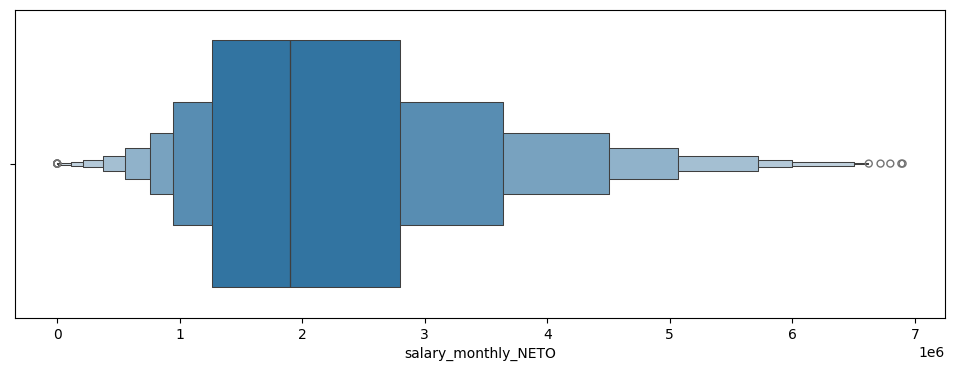

In [38]:
plt.figure(figsize=(12,4))
max_limit = df2[salary].quantile(.98)
sn.boxenplot(x=df2[df2[salary] < max_limit][salary])

In [48]:
print(f"Mediana: ARS {df2[col].median():,.2f}") #  , → separador de miles y .2f → 2 decimales en formato de punto fijo.

Mediana: ARS 1,916,958.00


Al filtrar el percentil 98 sacamos el 2% mas alto para que el gráfico no quede aplastado por la cola derecha, asún así podemos ver una asimetría hacia la derecha.

Podemos ver que la mayoría de los salarios está concentrada alrededor de la **mediana ARS 1,916,958.00**